# Visualizar variables de output de modelos traducidos SD => DESV

In [66]:
import re
import matplotlib.pyplot as plt
import random
import csv
from collections import OrderedDict
import copy

#filename = 'goodwin-minsky/goodwin.out'
#variables = ['laborproductivity', 'wagerate', 'population', 'capital', 'debt']

filename = 'result_start_10.10_01.csv'
variables = ['A', 'B', 'I']

def get_value_set(value):
    value_as_float = float(value)
    if value_as_float < -1.0:
        return 'A'
    elif value_as_float > 1.0:
        return 'B'
    elif value_as_float >= -1.0 and value_as_float <= 1.0:
        return 'I'
    else: 
        return None

def new_value(row):
    value = { 'A': set(), 'B': set(), 'I': set()}
    row_set = get_value_set(row['value'])
    if row_set is not None:
        value[row_set] = value[row_set].add(row['id'])
        return value

def get_actual_set(sets, id_value):
    for var in variables:
        if id_value in sets[var]:
            return var
    
    return None
    
    
def update(actual_value, row):
    row_set = get_value_set(row['value'])
    if row_set is not None:
        actual_set = get_actual_set(actual_value, row['id'])
        if actual_set is not None:
            if actual_set != row_set:
                actual_value[actual_set].remove(row['id'])
                actual_value[row_set].add(row['id'])
        else:
            actual_value[row_set].add(row['id'])
            
        return actual_value

def get_var(time_dict, varname):
    times = time_dict.keys()
    rv = []
    for key, value in time_dict.items():
        rv.append((key, len(value[varname])))
        
    return rv
    


time_set_q = OrderedDict()
time_set_q[0.0] = { 'A': set(), 'B': set(), 'I': set()}


with open(filename, 'r') as csvfile:
    reader = csv.DictReader(csvfile,['time','sec','cell_type','x','y','z','id','value','out_model_type','out_model_id'])
    actual_sec = 0.0
    for row in reader:
        if row['z'] == '1':
            continue
        sec = float(row['sec'])
        if sec in time_set_q:
            time_set_q[sec] = update(time_set_q[sec], row)
        else:
            time_set_q[sec] = update(copy.deepcopy(time_set_q[actual_sec]), row)
            actual_sec = sec

    
# rand_smpl = [ mylist[i] for i in sorted(random.sample(xrange(len(mylist)), 4)) ]

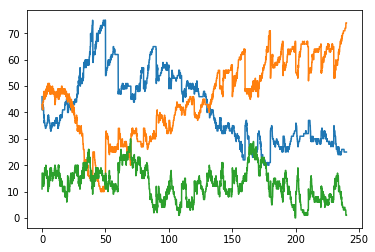

In [67]:
# Todos juntos
for varname in variables:
    plt.figure(1)
    mylist = get_var(time_set_q, varname)
    ts,vals = zip(*mylist)
    plt.plot(ts,vals)

plt.show()

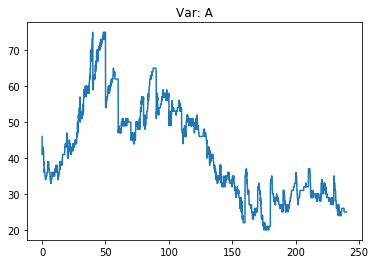

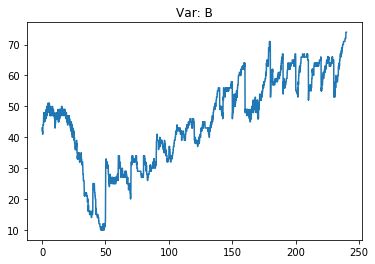

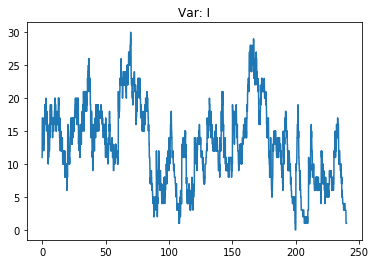

In [69]:
# Todos separados
i = 1
for varname in variables:
    mylist = get_var(time_set_q, varname)
    ts, vals = zip(*mylist)
    
    plt.figure(i)
    plt.plot(ts,vals)
    plt.title('Var: ' + varname)
    i += 1
plt.show()